In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sys.path.append('..')
from src.load_data import read_tables, tidy_and_split_data

In [45]:
df = read_tables("../data")
tidy_df, X, y = tidy_and_split_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(16, 32),
    max_iter=400,
    random_state=42,
)

In [51]:
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X)
y_pred_test = mlp_model.predict(X_test)

c:\Users\migue\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
root_mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(0.48038432557569977, 0.9958549193725102)

<Axes: >

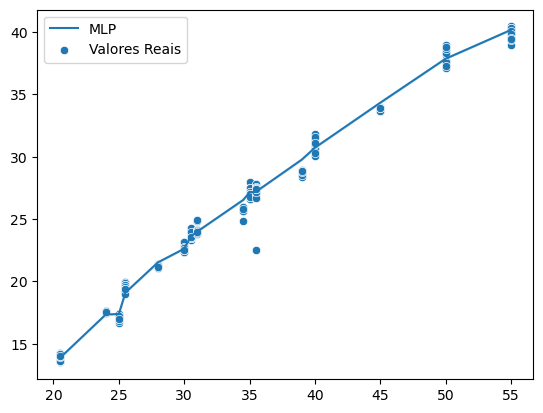

In [53]:
sns.lineplot(x=tidy_df.H.values, y=y_pred.reshape(-1,), label="MLP")
sns.scatterplot(x=tidy_df.H.values, y=y, label="Valores Reais")